<a href="https://colab.research.google.com/github/BBANGSUL/BBANGSUL/blob/main/N421_count-based_representation/N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [28]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [29]:
df

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...
...,...,...,...,...,...
1295,1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,https://www.indeed.com/viewjob?jk=cf3a6989c432...
1296,1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...,https://www.indeed.com/viewjob?jk=674682157fdf...
1297,1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,https://www.indeed.com/viewjob?jk=4e38a8dddb16...
1298,1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...",https://www.indeed.com/viewjob?jk=ddef07b8b441...


In [30]:
columns = ['title', 'company', 'description']

df = df[columns]

In [31]:
df.duplicated().sum()

543

In [37]:
df = df.drop_duplicates(keep = 'first')

In [39]:
df.reset_index(inplace = True, drop = True)

In [41]:
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [3]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [44]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [job, details, , description, , essential, dut...
1    [as, a, team, member, in, the, finance, and, i...
2    [overview, , american, credit, acceptance, see...
3    [jp, morgans, corporate, , investment, bank, c...
4    [at, vystar, we, offer, competitive, pay, an, ...
Name: tokens, dtype: object

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [45]:
def word_count(docs):
  from collections import Counter
  word_counts = Counter()
  word_in_docs = Counter()
  total_docs = len(docs)

  for doc in docs:
      word_counts.update(doc)
      word_in_docs.update(set(doc))

  temp = zip(word_counts.keys(), word_counts.values())
  wc = pd.DataFrame(temp,columns=['word','count'])

  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()

  wc['percent'] = wc['count'].apply(lambda x: x/total)
  wc = wc.sort_values(by='rank')

  wc['cul_percent'] = wc['percent'].cumsum()

  temp2 = zip(word_in_docs.keys(), word_in_docs.values())
  ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
  wc = ac.merge(wc, on='word')

  wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x/total_docs)
  return wc.sort_values(by='rank')

In [46]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
205,and,755,21864,1.0,0.053487,0.053487,0.997358
0,,751,21493,2.0,0.052580,0.106067,0.992074
127,to,754,12694,3.0,0.031054,0.137121,0.996037
88,the,745,10538,4.0,0.025780,0.162901,0.984148
76,of,745,8839,5.0,0.021623,0.184524,0.984148
43,data,740,7425,6.0,0.018164,0.202689,0.977543
74,in,748,6769,7.0,0.016559,0.219248,0.988111
87,a,739,6436,8.0,0.015745,0.234993,0.976222
152,with,742,5727,9.0,0.014010,0.249003,0.980185
405,for,727,4132,10.0,0.010108,0.259111,0.960370


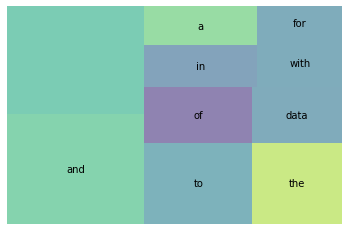

In [48]:
import squarify
import matplotlib.pyplot as plt

wc_top10 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6 )
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [49]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data','work'])

In [50]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
17,\n,732,15158,1.0,0.057309,0.057309,0.966975
169,\n\n,607,3904,2.0,0.014760,0.072069,0.801849
73,experience,687,3055,3.0,0.011550,0.083619,0.907530
524,business,518,1885,4.0,0.007127,0.090746,0.684280
136,team,548,1323,5.0,0.005002,0.095748,0.723910
561,learning,467,1193,6.0,0.004510,0.100259,0.616909
565,machine,468,1140,7.0,0.004310,0.104569,0.618230
681,science,460,1048,8.0,0.003962,0.108531,0.607662
32,ability,452,958,9.0,0.003622,0.112153,0.597094
52,analysis,436,896,10.0,0.003388,0.115540,0.575958


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [51]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [52]:
df['lemmas'] = df['description'].apply(get_lemmas)

In [54]:
df['lemmas'].head(10)

0    [Job, Details, \n, Description, \n, Essential,...
1    [team, member, Finance, Internal, Audit, depar...
2    [overview, \n, American, Credit, Acceptance, s...
3    [J.P., Morgan, Corporate, Investment, Bank, CI...
4    [VyStar, offer, competitive, pay, excellent, b...
5    [apply, role, choose, work, follow, location, ...
6    [Company, \n\n, Hitachi, Vantara, wholly, own,...
7    [Remote, Friendly, long, locate, Pacific, Moun...
8    [Equal, Opportunity, Employer, woman, minority...
9    [subsidiary, Colas, Inc., 100, \n\n, Colas, In...
Name: lemmas, dtype: object

## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [58]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_tuned = TfidfVectorizer(stop_words='english',max_features=3000)

dtm_tfidf_tuned = tfidf_tuned.fit_transform(df['description'])
dtm_tfidf_tuned = pd.DataFrame(dtm_tfidf_tuned.todense(), columns=tfidf_tuned.get_feature_names())
dtm_tfidf_tuned.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,14,15,18,19,...,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.023379,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.018485,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05851,0.0,0.000000,0.017488,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.060084,0.013012,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.047268,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_tuned)

NearestNeighbors(algorithm='kd_tree')

In [61]:
nn.kneighbors([dtm_tfidf_tuned.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [63]:
df['senior'] = df['title'].apply(lambda x:1 if 'Senior' in x else 0)

In [64]:
df['senior'].value_counts()

0    662
1     95
Name: senior, dtype: int64

In [65]:
df[df['senior']==1]

,title,company,description,tokens,lemmas,senior
652,Data Analyst Senior,"Experity, Inc",Experity is an industry-leading software and s...,"[experity, industry-leading, software, service...","[experity, industry, lead, software, service, ...",1
654,"Senior Data Scientist, FP&A",The J. M. Smucker Company,"The Senior Data Scientist, FP&A role is primar...","[senior, scientist,, fp&a, role, primarily, re...","[Senior, Data, Scientist, FP&A, role, primaril...",1
655,Senior Data Scientist – Central Product Insights,Spotify,The Personalization team makes deciding what t...,"[personalization, team, makes, deciding, play,...","[personalization, team, make, decide, play, ea...",1
656,Senior Data Scientist - Quality Systems,Tesla,Role\nThe quality data science team is respons...,"[role, \n, quality, science, team, responsible...","[role, \n, quality, datum, science, team, resp...",1
657,Analytics Data Scientist Senior Advisor,CVS Health,Manages and is responsible for the successful ...,"[manages, responsible, successful, delivery, a...","[Manages, responsible, successful, delivery, a...",1
...,...,...,...,...,...,...
752,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...,"[expert, delivery, &, business, intelligence, ...","[Expert, Delivery, Business, Intelligence, tea...",1
753,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’...","[music, everyone,, credit, card, needed., it’s...","[music, credit, card, need, promise, platform,...",1
754,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, &, applied, scientist, \n, passion, m...","[Senior, Data, Applied, Scientist, \n, passion...",1
755,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, global, commerce, leader, allows, shape...","[eBay, global, commerce, leader, allow, shape,...",1


문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf_tuned, df['senior'], test_size=0.1, random_state=42)

model = DecisionTreeClassifier(random_state=42)

In [67]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
from sklearn.metrics import recall_score, precision_score
y_pred = model.predict(X_test)

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.26666666666666666
0.5
